In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


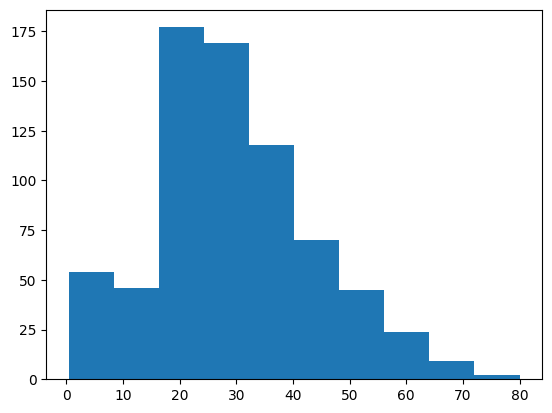

In [3]:
plt.hist(df[['Age']], bins = 10)
plt.show()

## Median Imputation

In [4]:
#data is scewed and values are missing at random
#I will use median imputation method
median = df['Age'].median()
median

28.0

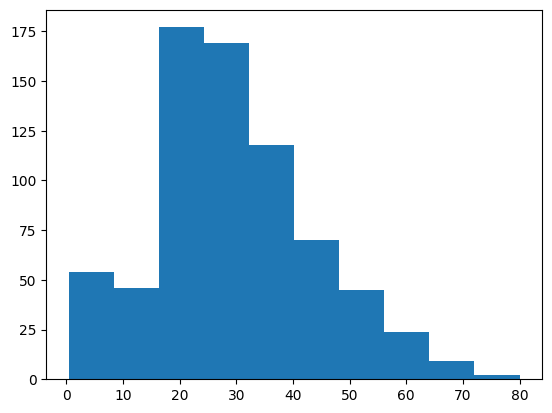

In [5]:
test_df = df.copy()
test_df['Age'].fillna(median, inplace=False)
plt.hist(test_df[['Age']], bins = 10)
plt.show()

## Linear Regression Imputation
Age based of survival???

In [6]:
df_test2 = df.copy()

df_complete = df_test2.dropna(subset=['Age'], axis=0)
df_missing = df_test2[df_test2['Age'].isnull()]

x_train = df_complete['Survived'].values.reshape(-1,1)
y_train = df_complete['Age'].values.reshape(-1,1)

regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

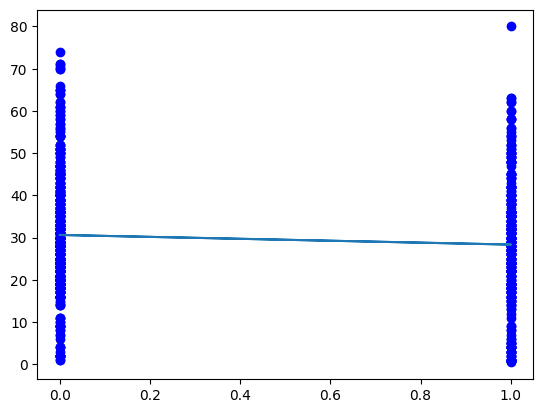

In [8]:
plt.scatter(df_test2.Survived, df_test2.Age, color = "Blue")
plt.plot(x_train, regr.coef_[0][0]*x_train + regr.intercept_[0])

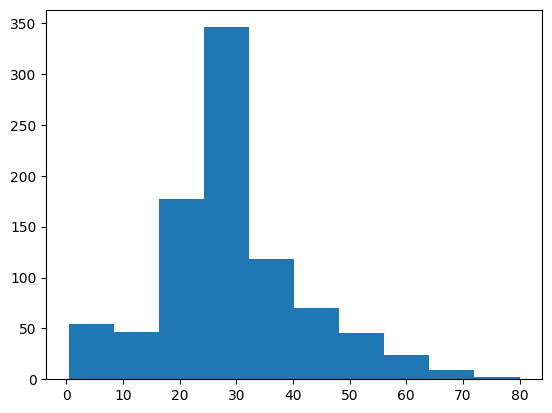

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.750072,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.010682,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
x_test = df_missing['Survived'].values.reshape(-1,1)
y_pred = regr.predict(x_test)
df_test2.loc[df_test2['Age'].isnull(), 'Age'] = np.squeeze(y_pred)

plt.hist(df_test2[['Age']], bins = 10)
plt.show()

df_test2.describe()

In [10]:
#MSE
df_test31 = df.copy()
df_test31 = df_test31.dropna(subset = "Age", axis=0)
original = df_test31['Age'].values

pred = df_test2['Age'].values
pred_samp = np.random.choice(pred, size = 714, replace=False)
mse = mean_squared_error(original, pred_samp)
mse

377.22340058896606

It is an absolutely horrible idea to use linear regression here

## KNN imputation

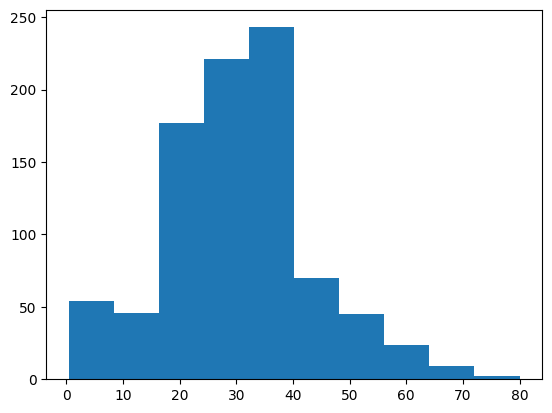

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,30.237149,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.121322,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
from sklearn.impute import KNNImputer

df_test3 = df.copy()

knn_i = KNNImputer(n_neighbors=27)
df_test3['Age'] = knn_i.fit_transform(df_test3[['Survived', 'Age']])[:,1]

plt.hist(df_test3[['Age']], bins = 10)
plt.show()

df_test3.describe()

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#MSE
pred = df_test3['Age'].values
pred_samp = np.random.choice(pred, size = 714, replace=False)
mse = mean_squared_error(original, pred_samp)
mse

384.67203920876995

Does not look to me much better than the linear regression

## K-Fold Cross Validation 

In [14]:
from sklearn.model_selection import KFold

df_test4 = df.copy()
df_test4 = df.dropna(subset = 'Age', axis = 0)
num_folds = 5

kf = KFold(n_splits = num_folds)

train_scores = []
test_scores = []

for train_index, test_index in kf.split(df_test4):
    train_data = df_test4.iloc[train_index]
    test_data = df_test4.iloc[test_index]
    
    model = LinearRegression()
    
    x_train = train_data['Survived'].values.reshape(-1,1)
    y_train = train_data['Age'].values.reshape(-1,1)
    
    x_test = test_data['Survived'].values.reshape(-1,1)
    y_test = test_data['Age'].values.reshape(-1,1)
    
    model.fit(x_train, y_train)
   
    y_test_pred = model.predict(x_test) 
    y_train_pred = model.predict(x_train)
    
    test_score = mean_squared_error(y_test, y_test_pred)
    train_score = mean_squared_error(y_train, y_train_pred)
    
    test_scores.append(test_score)
    train_scores.append(train_score)

avg_train_score = sum(train_scores) / num_folds
avg_test_score = sum(test_scores) / num_folds

print("Average Training score (MSE):", avg_train_score)
print("Average Validation score (MSE):", avg_test_score)
    

Average Training score (MSE): 209.26236428240378
Average Validation score (MSE): 211.29238633802956


## Random Forest Classifier

I will try to predict cabin class

In [15]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

#### Data Preparation
 - Remove Cabin, fare, passengerId, Name, and ticket columns
 - Get rid of NaNs
 - Separate Pclass
 - Make them numpy ndarray
 - One hot encoding for all strings
 

In [16]:
X = df[['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
X = X.dropna(subset=['Age', 'Embarked'], axis = 0)
y = df['Pclass']

categorical_cols = ['Sex', 'Embarked']

encoded_dfs = []
for col in categorical_cols:
    encoded_df = pd.get_dummies(df[col], prefix=col)
    encoded_dfs.append(encoded_df)
    
X = pd.concat([X] + encoded_dfs, axis = 1)
X = X.dropna()

X = X.drop(categorical_cols, axis=1)

X, y = np.asarray(X), np.asarray(y)

#### K-fold cross validation

In [17]:
from sklearn.ensemble import RandomForestClassifier

num_fols = 5
kf = KFold(n_splits = num_folds)

mse_scores = []
y_true = []
y_pred_all = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    
    y_pred =rfc.predict(X_test)
    
    y_true.extend(y_test)
    y_pred_all.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
      
    
avg = sum(mse_scores)/num_folds
avg   

1.359568600413671

### *Visualizationss*


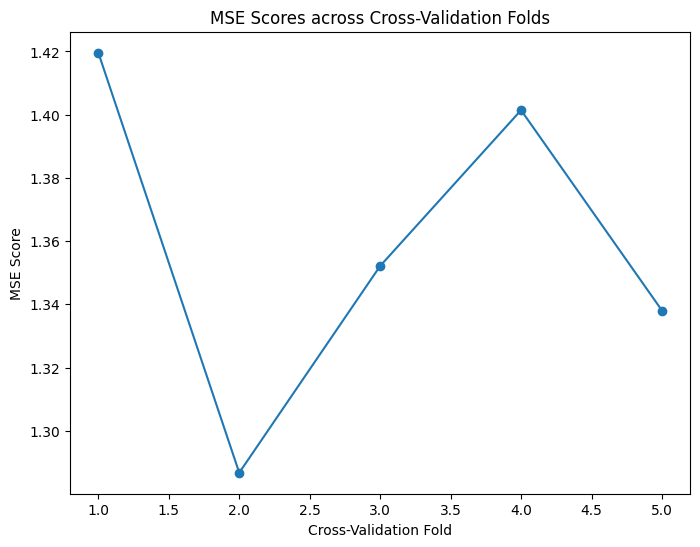

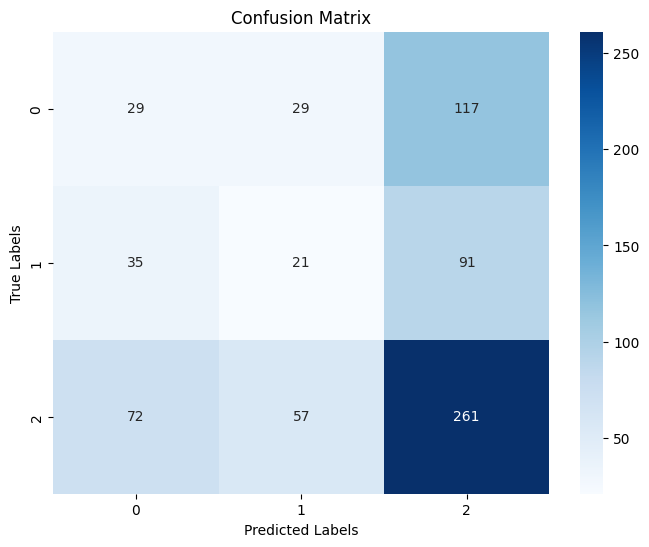

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Line Plot for mse
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_folds + 1), mse_scores, marker='o')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('MSE Score')
plt.title('MSE Scores across Cross-Validation Folds')
plt.show()

#Confussion Matrix
cm = confusion_matrix(y_true, y_pred_all)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()